In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.formatter.useoffset'] = False

#%load_ext rpy2.ipython



In [3]:
def formatAxes(ax,text_size=10,xlim=None,xlabel=None,xticks=None,xticklabels=None,ylim=None,yticks=None,ylabel=None,yticklabels=None):
    """ to tweak the plotting of the axes as well as the fontsize """
    for loc,spine in list(ax.spines.items()):
        if loc == 'left': # settings for the y-axis
            if yticklabels and not yticks:
                sys.stderr.write("Need to provide a list wiht both y-labels and y-ticks!")
            if yticks:
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_tick_params(direction='out')
                spine.set_visible(True)
                spine.set_position(("outward",1))
                spine.set_smart_bounds(True)
                ax.set_yticks(yticks)
                if ylim:
                    ax.set_ylim(ylim)
                if yticklabels:
                    ax.set_yticklabels(yticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_yticklabels([])
                ax.tick_params(axis='y',which='both',length=0)
                
            if ylabel:
                ax.set_ylabel(ylabel,fontsize=text_size,rotation=0,labelpad=160)
                ax.get_yaxis().set_label_coords(-0.1,0.5)
        elif loc == 'bottom': # settings for x-axis
            if xticks:
                spine.set_position('zero')
                spine.set_visible(False)
                spine.set_smart_bounds(False)
                ax.set_xticks(xticks)
                ax.tick_params(axis='x',which='both',length=0)
                if xlim:
                    ax.set_xlim(xlim)
                if xticklabels:
                    ax.set_xticklabels(xticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_xticklabels([])
                ax.tick_params(axis='x',which='both',length=0)
                
            if xlabel:
                ax.tick_params(axis='x',which='both',length=0)
                ax.set_xlabel(xlabel,fontsize=text_size+2)
                ax.xaxis.labelpad = 10
        else:
            spine.set_visible(False)
    ax.patch.set_visible(False)

In [4]:
## Loading the big dataframe
alldata = pd.read_csv('../../../big_dataframe_Xist_diffBUM_HMM_scaled_dc.txt',sep="\t",header=0,index_col=0)


In [5]:
alldata.head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR
0,1,C,0,0,0.0,0,0,0,0,0,0,1.693237e-14,1.790644e-20,0
1,2,G,0,0,0.0,0,0,0,0,0,0,6.789051e-03,6.823904e-03,0
2,3,G,0,0,0.0,0,0,0,0,0,0,9.031615e-03,9.110841e-03,0
3,4,C,0,0,0.0,0,0,0,0,0,0,6.793530e-03,6.927069e-03,0
4,5,T,0,0,0.0,0,0,0,0,0,0,1.128597e-08,5.186918e-06,0


### Count number of DRNs in diffBUM_HMM data:

In [6]:
threshold = 0.95

counter = 0
counter2 = 0
for index, row in alldata.iterrows():
    if row['diffBUMHMM_ex_vivo'] > threshold:
        counter = counter+1    
    elif row['diffBUMHMM_in_cell'] > threshold:
        counter2= counter2 +1
    else:
        continue
        
print("ex_vivo\t",counter)
print("in_vivo\t",counter2)

ex_vivo	 1739
in_vivo	 188


### How many binding sites for each protein were found that overlapped with modified nucleotides in the ex vivo data?

In [8]:
morereactive_ex_vivo = alldata[alldata.diffBUMHMM_ex_vivo > threshold]
proteins = alldata.columns[5:11]

In [9]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_ex_vivo[protein].sum()))

CELF1	total_count:	60
FUS	total_count:	375
HuR	total_count:	96
PTBP1	total_count:	53
RBFOX2	total_count:	2
TARDBP	total_count:	58


In [10]:
##IN CELL

In [11]:
morereactive_in_cell = alldata[alldata.diffBUMHMM_in_cell > threshold]
proteins = alldata.columns[5:11]

In [12]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_in_cell[protein].sum()))

CELF1	total_count:	11
FUS	total_count:	33
HuR	total_count:	17
PTBP1	total_count:	10
RBFOX2	total_count:	2
TARDBP	total_count:	2


### Same but in delta_SHAPE

In [13]:
alldata[alldata.DeltaSHAPE_ex_vivo > 0].head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR
209,210,T,1,0,1.365817,0,0,0,0,0,0,3.341549e-04,4.392628e-01,1
210,211,T,1,0,1.504202,0,0,0,0,0,0,6.123091e-24,1.242867e-52,1
211,212,T,1,0,1.721811,0,0,0,0,0,0,1.802013e-04,2.930757e-01,1
243,244,A,1,0,1.628085,0,0,1,0,0,0,2.619692e-12,3.105350e-56,1
244,245,T,1,0,2.116178,0,0,1,0,0,0,1.021677e-03,2.388718e-01,1


In [14]:
counter = 0
counter2 = 0
for index, row in alldata.iterrows():
    if row['DeltaSHAPE_ex_vivo'] > 0.0:
        counter = counter+1    
    elif row['DeltaSHAPE_in_cell'] > 0.0:
        counter2= counter2 +1
    else:
        continue
        
print("dSHAPE ex vivo %s" % counter)
print("dSHAPE in vivo %s" % counter2)

dSHAPE ex vivo 866
dSHAPE in vivo 683


In [15]:
morereactive_ex_vivo = alldata[alldata.DeltaSHAPE_ex_vivo > 0]

In [16]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_ex_vivo[protein].sum()))

CELF1	total_count:	104
FUS	total_count:	162
HuR	total_count:	171
PTBP1	total_count:	95
RBFOX2	total_count:	3
TARDBP	total_count:	8


In [17]:
##IN CELL

In [18]:
morereactive_in_cell_deltashape = alldata[alldata.DeltaSHAPE_in_cell > 0]

In [19]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_in_cell_deltashape[protein].sum()))

CELF1	total_count:	24
FUS	total_count:	192
HuR	total_count:	34
PTBP1	total_count:	21
RBFOX2	total_count:	0
TARDBP	total_count:	16


In [20]:
print(alldata.columns)

Index(['nucleotide_number', 'nucleotide_identity', 'DeltaSHAPE_ex_vivo',
       'DeltaSHAPE_in_cell', 'average_deltaSHAPE', 'CELF1', 'FUS', 'HuR',
       'PTBP1', 'RBFOX2', 'TARDBP', 'diffBUMHMM_in_cell', 'diffBUMHMM_ex_vivo',
       'dStruct_DDR'],
      dtype='object')


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


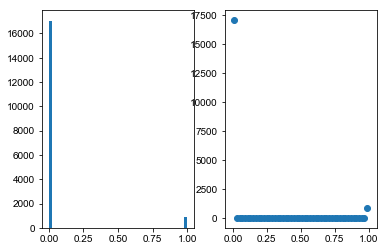

In [21]:
npa= alldata.as_matrix(columns=alldata.columns[2:3])

npasqueeze= np.squeeze(npa)

fig = plt.figure()
ax1 = fig.add_subplot(121)
n, bins, patches = ax1.hist(npasqueeze, bins=50)  # output is two arrays

# Scatter plot
# Now we find the center of each bin from the bin edges
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
ax2 = fig.add_subplot(122)
ax2.scatter(bins_mean, n)
plt.show()


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


(17918,)
[60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60
 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60
 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60
 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60
 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59
 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60
 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60
 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60 59
 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60
 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60
 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59
 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60
 60 59 60 60 59 60 60 60 59 60 60 60]
[ 0  0  0  3  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 

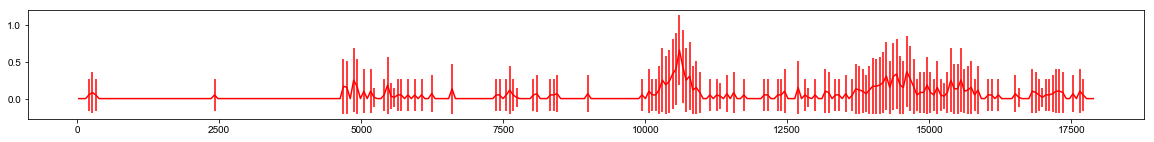

In [18]:
#FOR DELTASHAPE

npa= alldata.as_matrix(columns=alldata.columns[2:3])
y= np.squeeze(npa)


npa2= alldata.as_matrix(columns=alldata.columns[0:1])
x= np.squeeze(npa2)
print(x.shape)

nbins = 300

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

#plt.plot(x, y, 'bo')
#plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

print(n)
print(sy)
print(mean)



C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


[0. 0. 0. ... 0. 0. 0.]
(17918,)
[1.00000e+00 1.79270e+03 3.58440e+03 5.37610e+03 7.16780e+03 8.95950e+03
 1.07512e+04 1.25429e+04 1.43346e+04 1.61263e+04 1.79180e+04]
[  896.85  2688.55  4480.25  6271.95  8063.65  9855.35 11647.05 13438.75
 15230.45 17022.15]
[1792 1792 1792 1791 1792 1792 1791 1792 1792 1792]
[166.83745401 146.26172655 145.26440877 270.27458906  65.39326477
 233.79765641 105.16368554 225.04273138 157.86462918 212.96393743]
[0.09310126 0.08161927 0.08106273 0.15090708 0.03649178 0.13046744
 0.05871786 0.12558188 0.0880941  0.11884148]
[  897.  2689.  4480.  6272.  8064.  9855. 11647. 13439. 15230. 17022.]
0
this is nucleotide 1
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 2
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 3
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 4
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 5
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 6
this is the bin 897.0

this is nucleotide 141
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 142
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 143
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 144
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 145
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 146
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 147
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 148
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 149
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 150
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 151
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 152
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 153
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 154
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 155
this is the bin 897.0
assigned bin is 1

1
0
this is nucleotide 267
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 268
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 269
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 270
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 271
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 272
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 273
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 274
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 275
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 276
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 277
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 278
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 279
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 280
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 281
this is the bin 897.0
assigned bin 

this is nucleotide 410
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 411
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 412
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 413
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 414
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 415
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 416
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 417
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 418
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 419
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 420
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 421
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 422
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 423
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 424
this is the bin 897.0
assigned bin is 1

this is nucleotide 586
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 587
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 588
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 589
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 590
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 591
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 592
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 593
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 594
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 595
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 596
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 597
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 598
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 599
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 600
this is the bin 897.0
assigned bin is 1

this is nucleotide 714
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 715
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 716
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 717
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 718
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 719
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 720
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 721
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 722
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 723
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 724
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 725
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 726
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 727
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 728
this is the bin 897.0
assigned bin is 1

this is nucleotide 878
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 879
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 880
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 881
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 882
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 883
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 884
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 885
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 886
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 887
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 888
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 889
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 890
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 891
this is the bin 897.0
assigned bin is 1
1
0
this is nucleotide 892
this is the bin 897.0
assigned bin is 1

this is nucleotide 1019
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1020
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1021
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1022
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1023
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1024
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1025
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1026
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1027
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1028
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1029
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1030
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1031
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1032
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1033
this is th

this is nucleotide 1144
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1145
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1146
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1147
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1148
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1149
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1150
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1151
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1152
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1153
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1154
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1155
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1156
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1157
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1158
this is th

assigned bin is 2
2
0
this is nucleotide 1294
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1295
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1296
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1297
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1298
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1299
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1300
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1301
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1302
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1303
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1304
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1305
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1306
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1307
this is the bin 2689.0
assigned bin is 2
2
0
this is nucl

this is nucleotide 1433
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1434
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1435
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1436
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1437
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1438
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1439
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1440
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1441
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1442
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1443
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1444
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1445
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1446
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1447
this is th

this is nucleotide 1576
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1577
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1578
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1579
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1580
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1581
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1582
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1583
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1584
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1585
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1586
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1587
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1588
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1589
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1590
this is th

this is nucleotide 1719
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1720
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1721
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1722
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1723
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1724
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1725
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1726
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1727
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1728
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1729
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1730
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1731
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1732
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1733
this is th

this is nucleotide 1873
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1874
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1875
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1876
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1877
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1878
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1879
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1880
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1881
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1882
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1883
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1884
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1885
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1886
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 1887
this is th

this is nucleotide 2039
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2040
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2041
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2042
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2043
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2044
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2045
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2046
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2047
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2048
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2049
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2050
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2051
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2052
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2053
this is th

this is nucleotide 2184
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2185
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2186
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2187
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2188
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2189
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2190
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2191
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2192
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2193
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2194
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2195
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2196
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2197
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2198
this is th

this is nucleotide 2334
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2335
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2336
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2337
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2338
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2339
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2340
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2341
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2342
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2343
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2344
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2345
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2346
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2347
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2348
this is th

this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2491
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2492
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2493
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2494
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2495
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2496
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2497
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2498
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2499
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2500
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2501
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2502
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2503
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2504
this is the bin 2689.0
assigned bi

this is nucleotide 2636
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2637
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2638
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2639
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2640
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2641
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2642
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2643
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2644
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2645
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2646
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2647
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2648
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2649
this is the bin 2689.0
assigned bin is 2
2
0
this is nucleotide 2650
this is th

this is nucleotide 2763
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2764
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2765
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2766
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2767
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2768
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2769
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2770
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2771
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2772
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2773
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2774
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2775
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2776
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2777
this is th

this is nucleotide 2890
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2891
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2892
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2893
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2894
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2895
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2896
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2897
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2898
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2899
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2900
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2901
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2902
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2903
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 2904
this is th

this is nucleotide 3011
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3012
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3013
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3014
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3015
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3016
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3017
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3018
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3019
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3020
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3021
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3022
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3023
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3024
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3025
this is th

this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3142
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3143
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3144
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3145
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3146
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3147
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3148
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3149
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3150
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3151
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3152
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3153
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3154
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3155
this is the bin 4480.0
assigned bi

this is nucleotide 3268
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3269
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3270
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3271
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3272
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3273
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3274
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3275
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3276
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3277
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3278
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3279
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3280
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3281
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3282
this is th

this is nucleotide 3390
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3391
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3392
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3393
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3394
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3395
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3396
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3397
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3398
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3399
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3400
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3401
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3402
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3403
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3404
this is th

this is nucleotide 3554
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3555
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3556
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3557
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3558
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3559
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3560
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3561
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3562
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3563
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3564
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3565
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3566
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3567
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3568
this is th

this is nucleotide 3677
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3678
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3679
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3680
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3681
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3682
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3683
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3684
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3685
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3686
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3687
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3688
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3689
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3690
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3691
this is th

this is nucleotide 3852
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3853
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3854
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3855
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3856
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3857
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3858
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3859
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3860
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3861
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3862
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3863
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3864
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3865
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 3866
this is th

this is nucleotide 4003
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4004
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4005
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4006
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4007
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4008
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4009
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4010
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4011
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4012
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4013
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4014
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4015
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4016
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4017
this is th

this is nucleotide 4173
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4174
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4175
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4176
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4177
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4178
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4179
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4180
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4181
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4182
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4183
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4184
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4185
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4186
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4187
this is th

this is nucleotide 4346
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4347
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4348
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4349
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4350
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4351
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4352
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4353
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4354
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4355
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4356
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4357
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4358
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4359
this is the bin 4480.0
assigned bin is 3
3
0
this is nucleotide 4360
this is th

this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4487
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4488
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4489
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4490
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4491
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4492
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4493
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4494
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4495
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4496
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4497
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4498
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4499
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4500
this is the bin 6272.0
assigned bi

this is nucleotide 4628
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4629
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4630
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4631
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4632
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4633
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4634
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4635
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4636
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4637
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4638
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4639
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4640
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4641
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4642
this is th

this is nucleotide 4754
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4755
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4756
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4757
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4758
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4759
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4760
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4761
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4762
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4763
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4764
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4765
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4766
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4767
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4768
this is th

this is nucleotide 4873
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4874
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4875
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4876
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4877
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4878
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4879
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4880
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4881
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4882
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4883
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4884
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4885
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4886
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 4887
this is th

this is nucleotide 5003
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5004
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5005
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5006
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5007
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5008
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5009
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5010
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5011
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5012
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5013
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5014
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5015
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5016
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5017
this is th

this is nucleotide 5129
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5130
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5131
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5132
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5133
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5134
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5135
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5136
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5137
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5138
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5139
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5140
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5141
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5142
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5143
this is th

this is nucleotide 5279
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5280
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5281
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5282
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5283
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5284
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5285
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5286
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5287
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5288
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5289
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5290
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5291
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5292
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5293
this is th

this is nucleotide 5421
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5422
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5423
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5424
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5425
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5426
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5427
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5428
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5429
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5430
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5431
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5432
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5433
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5434
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5435
this is th

this is nucleotide 5541
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5542
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5543
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5544
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5545
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5546
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5547
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5548
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5549
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5550
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5551
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5552
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5553
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5554
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5555
this is th

4
0
this is nucleotide 5667
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5668
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5669
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5670
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5671
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5672
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5673
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5674
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5675
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5676
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5677
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5678
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5679
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5680
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5681
this i

this is nucleotide 5809
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5810
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5811
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5812
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5813
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5814
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5815
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5816
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5817
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5818
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5819
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5820
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5821
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5822
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5823
this is th

this is nucleotide 5946
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5947
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5948
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5949
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5950
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5951
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5952
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5953
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5954
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5955
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5956
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5957
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5958
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5959
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 5960
this is th

this is nucleotide 6088
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6089
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6090
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6091
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6092
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6093
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6094
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6095
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6096
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6097
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6098
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6099
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6100
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6101
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6102
this is th

this is nucleotide 6223
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6224
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6225
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6226
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6227
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6228
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6229
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6230
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6231
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6232
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6233
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6234
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6235
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6236
this is the bin 6272.0
assigned bin is 4
4
0
this is nucleotide 6237
this is th

this is nucleotide 6353
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6354
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6355
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6356
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6357
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6358
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6359
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6360
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6361
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6362
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6363
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6364
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6365
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6366
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6367
this is th

this is nucleotide 6473
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6474
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6475
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6476
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6477
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6478
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6479
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6480
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6481
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6482
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6483
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6484
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6485
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6486
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6487
this is th

this is nucleotide 6614
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6615
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6616
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6617
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6618
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6619
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6620
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6621
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6622
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6623
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6624
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6625
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6626
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6627
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6628
this is th

this is nucleotide 6735
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6736
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6737
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6738
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6739
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6740
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6741
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6742
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6743
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6744
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6745
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6746
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6747
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6748
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6749
this is th

this is nucleotide 6880
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6881
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6882
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6883
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6884
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6885
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6886
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6887
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6888
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6889
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6890
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6891
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6892
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6893
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 6894
this is th

this is nucleotide 7000
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7001
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7002
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7003
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7004
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7005
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7006
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7007
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7008
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7009
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7010
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7011
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7012
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7013
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7014
this is th

this is nucleotide 7129
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7130
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7131
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7132
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7133
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7134
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7135
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7136
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7137
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7138
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7139
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7140
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7141
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7142
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7143
this is th

this is nucleotide 7282
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7283
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7284
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7285
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7286
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7287
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7288
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7289
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7290
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7291
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7292
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7293
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7294
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7295
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7296
this is th

this is nucleotide 7410
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7411
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7412
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7413
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7414
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7415
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7416
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7417
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7418
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7419
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7420
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7421
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7422
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7423
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7424
this is th

this is nucleotide 7550
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7551
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7552
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7553
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7554
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7555
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7556
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7557
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7558
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7559
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7560
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7561
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7562
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7563
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7564
this is th

this is nucleotide 7674
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7675
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7676
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7677
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7678
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7679
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7680
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7681
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7682
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7683
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7684
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7685
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7686
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7687
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7688
this is th

this is nucleotide 7812
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7813
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7814
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7815
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7816
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7817
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7818
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7819
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7820
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7821
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7822
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7823
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7824
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7825
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7826
this is th

this is nucleotide 7939
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7940
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7941
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7942
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7943
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7944
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7945
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7946
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7947
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7948
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7949
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7950
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7951
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7952
this is the bin 8064.0
assigned bin is 5
5
0
this is nucleotide 7953
this is th

this is nucleotide 8065
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8066
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8067
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8068
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8069
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8070
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8071
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8072
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8073
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8074
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8075
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8076
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8077
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8078
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8079
this is th

this is nucleotide 8202
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8203
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8204
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8205
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8206
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8207
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8208
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8209
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8210
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8211
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8212
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8213
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8214
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8215
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8216
this is th

this is nucleotide 8324
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8325
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8326
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8327
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8328
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8329
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8330
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8331
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8332
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8333
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8334
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8335
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8336
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8337
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8338
this is th

this is nucleotide 8466
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8467
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8468
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8469
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8470
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8471
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8472
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8473
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8474
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8475
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8476
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8477
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8478
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8479
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8480
this is th

this is nucleotide 8596
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8597
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8598
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8599
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8600
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8601
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8602
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8603
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8604
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8605
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8606
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8607
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8608
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8609
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8610
this is th

this is nucleotide 8753
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8754
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8755
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8756
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8757
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8758
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8759
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8760
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8761
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8762
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8763
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8764
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8765
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8766
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8767
this is th

this is nucleotide 8898
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8899
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8900
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8901
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8902
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8903
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8904
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8905
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8906
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8907
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8908
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8909
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8910
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8911
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 8912
this is th

this is nucleotide 9025
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9026
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9027
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9028
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9029
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9030
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9031
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9032
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9033
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9034
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9035
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9036
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9037
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9038
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9039
this is th

assigned bin is 6
6
0
this is nucleotide 9168
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9169
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9170
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9171
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9172
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9173
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9174
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9175
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9176
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9177
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9178
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9179
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9180
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9181
this is the bin 9855.0
assigned bin is 6
6
0
this is nucl

this is nucleotide 9313
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9314
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9315
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9316
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9317
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9318
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9319
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9320
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9321
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9322
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9323
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9324
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9325
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9326
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9327
this is th

this is nucleotide 9457
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9458
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9459
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9460
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9461
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9462
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9463
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9464
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9465
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9466
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9467
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9468
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9469
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9470
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9471
this is th

this is nucleotide 9592
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9593
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9594
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9595
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9596
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9597
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9598
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9599
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9600
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9601
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9602
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9603
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9604
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9605
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9606
this is th

this is nucleotide 9734
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9735
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9736
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9737
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9738
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9739
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9740
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9741
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9742
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9743
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9744
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9745
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9746
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9747
this is the bin 9855.0
assigned bin is 6
6
0
this is nucleotide 9748
this is th

this is nucleotide 9866
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9867
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9868
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9869
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9870
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9871
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9872
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9873
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9874
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9875
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9876
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9877
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9878
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9879
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9

7
0
this is nucleotide 9992
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9993
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9994
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9995
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9996
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9997
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9998
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 9999
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10000
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10001
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10002
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10003
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10004
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10005
this is the bin 11647.0
assigned bin is 7
7
0
this is nu

this is nucleotide 10123
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10124
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10125
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10126
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10127
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10128
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10129
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10130
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10131
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10132
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10133
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10134
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10135
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10136
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 10240
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10241
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10242
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10243
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10244
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10245
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10246
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10247
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10248
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10249
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10250
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10251
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10252
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10253
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 10364
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10365
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10366
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10367
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10368
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10369
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10370
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10371
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10372
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10373
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10374
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10375
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10376
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10377
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 10499
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10500
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10501
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10502
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10503
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10504
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10505
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10506
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10507
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10508
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10509
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10510
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10511
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10512
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 10629
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10630
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10631
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10632
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10633
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10634
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10635
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10636
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10637
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10638
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10639
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10640
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10641
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10642
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 10746
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10747
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10748
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10749
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10750
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10751
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10752
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10753
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10754
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10755
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10756
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10757
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10758
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10759
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 10876
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10877
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10878
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10879
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10880
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10881
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10882
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10883
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10884
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10885
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10886
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10887
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10888
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 10889
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 11004
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11005
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11006
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11007
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11008
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11009
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11010
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11011
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11012
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11013
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11014
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11015
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11016
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11017
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 11142
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11143
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11144
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11145
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11146
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11147
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11148
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11149
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11150
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11151
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11152
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11153
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11154
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11155
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 11263
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11264
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11265
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11266
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11267
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11268
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11269
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11270
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11271
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11272
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11273
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11274
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11275
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11276
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 11380
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11381
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11382
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11383
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11384
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11385
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11386
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11387
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11388
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11389
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11390
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11391
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11392
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11393
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 11507
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11508
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11509
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11510
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11511
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11512
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11513
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11514
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11515
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11516
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11517
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11518
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11519
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11520
this is the bin 11647.0
assigned bin is 7
7
0
this i

this is nucleotide 11636
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11637
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11638
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11639
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11640
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11641
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11642
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11643
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11644
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11645
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11646
this is the bin 11647.0
assigned bin is 7
7
0
this is nucleotide 11647
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11648
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11649
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 11761
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11762
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11763
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11764
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11765
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11766
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11767
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11768
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11769
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11770
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11771
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11772
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11773
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11774
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 11894
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11895
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11896
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11897
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11898
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11899
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11900
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11901
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11902
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11903
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11904
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11905
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11906
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 11907
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 12014
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12015
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12016
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12017
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12018
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12019
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12020
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12021
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12022
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12023
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12024
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12025
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12026
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12027
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 12151
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12152
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12153
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12154
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12155
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12156
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12157
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12158
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12159
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12160
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12161
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12162
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12163
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12164
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 12270
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12271
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12272
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12273
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12274
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12275
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12276
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12277
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12278
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12279
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12280
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12281
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12282
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12283
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 12391
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12392
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12393
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12394
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12395
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12396
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12397
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12398
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12399
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12400
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12401
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12402
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12403
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12404
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 12509
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12510
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12511
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12512
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12513
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12514
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12515
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12516
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12517
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12518
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12519
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12520
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12521
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12522
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 12639
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12640
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12641
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12642
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12643
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12644
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12645
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12646
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12647
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12648
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12649
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12650
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12651
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12652
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 12761
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12762
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12763
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12764
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12765
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12766
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12767
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12768
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12769
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12770
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12771
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12772
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12773
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12774
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 12886
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12887
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12888
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12889
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12890
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12891
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12892
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12893
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12894
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12895
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12896
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12897
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12898
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 12899
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 13014
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13015
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13016
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13017
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13018
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13019
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13020
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13021
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13022
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13023
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13024
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13025
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13026
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13027
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 13133
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13134
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13135
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13136
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13137
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13138
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13139
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13140
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13141
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13142
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13143
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13144
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13145
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13146
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 13250
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13251
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13252
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13253
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13254
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13255
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13256
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13257
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13258
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13259
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13260
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13261
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13262
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13263
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 13367
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13368
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13369
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13370
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13371
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13372
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13373
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13374
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13375
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13376
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13377
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13378
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13379
this is the bin 13439.0
assigned bin is 8
8
0
this is nucleotide 13380
this is the bin 13439.0
assigned bin is 8
8
0
this i

this is nucleotide 13489
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13490
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13491
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13492
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13493
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13494
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13495
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13496
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13497
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13498
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13499
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13500
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13501
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13502
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 13606
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13607
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13608
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13609
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13610
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13611
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13612
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13613
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13614
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13615
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13616
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13617
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13618
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13619
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 13724
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13725
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13726
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13727
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13728
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13729
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13730
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13731
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13732
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13733
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13734
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13735
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13736
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13737
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 13847
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13848
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13849
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13850
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13851
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13852
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13853
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13854
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13855
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13856
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13857
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13858
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13859
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13860
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 13967
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13968
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13969
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13970
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13971
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13972
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13973
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13974
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13975
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13976
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13977
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13978
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13979
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 13980
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 14093
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14094
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14095
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14096
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14097
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14098
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14099
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14100
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14101
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14102
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14103
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14104
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14105
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14106
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 14222
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14223
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14224
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14225
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14226
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14227
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14228
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14229
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14230
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14231
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14232
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14233
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14234
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14235
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 14346
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14347
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14348
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14349
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14350
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14351
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14352
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14353
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14354
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14355
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14356
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14357
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14358
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14359
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 14468
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14469
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14470
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14471
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14472
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14473
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14474
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14475
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14476
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14477
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14478
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14479
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14480
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14481
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 14595
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14596
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14597
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14598
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14599
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14600
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14601
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14602
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14603
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14604
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14605
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14606
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14607
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14608
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 14716
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14717
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14718
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14719
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14720
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14721
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14722
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14723
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14724
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14725
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14726
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14727
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14728
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14729
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 14842
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14843
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14844
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14845
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14846
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14847
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14848
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14849
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14850
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14851
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14852
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14853
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14854
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14855
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 14974
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14975
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14976
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14977
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14978
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14979
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14980
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14981
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14982
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14983
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14984
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14985
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14986
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 14987
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 15090
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15091
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15092
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15093
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15094
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15095
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15096
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15097
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15098
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15099
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15100
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15101
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15102
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15103
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 15213
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15214
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15215
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15216
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15217
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15218
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15219
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15220
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15221
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15222
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15223
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15224
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15225
this is the bin 15230.0
assigned bin is 9
9
0
this is nucleotide 15226
this is the bin 15230.0
assigned bin is 9
9
0
this i

this is nucleotide 15328
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15329
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15330
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15331
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15332
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15333
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15334
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15335
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15336
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15337
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15338
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15339
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15340
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15341
this is the bin 17022.0
as

this is nucleotide 15444
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15445
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15446
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15447
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15448
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15449
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15450
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15451
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15452
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15453
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15454
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15455
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15456
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15457
this is the bin 17022.0
as

this is nucleotide 15558
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15559
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15560
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15561
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15562
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15563
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15564
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15565
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15566
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15567
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15568
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15569
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15570
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15571
this is the bin 17022.0
as

this is nucleotide 15672
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15673
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15674
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15675
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15676
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15677
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15678
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15679
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15680
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15681
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15682
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15683
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15684
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15685
this is the bin 17022.0
as

this is nucleotide 15788
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15789
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15790
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15791
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15792
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15793
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15794
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15795
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15796
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15797
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15798
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15799
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15800
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15801
this is the bin 17022.0
as

assigned bin is 10
10
0
this is nucleotide 15909
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15910
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15911
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15912
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15913
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15914
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15915
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15916
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15917
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15918
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15919
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15920
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15921
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 15922
th

this is nucleotide 16028
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16029
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16030
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16031
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16032
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16033
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16034
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16035
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16036
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16037
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16038
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16039
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16040
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16041
this is the bin 17022.0
as

this is nucleotide 16150
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16151
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16152
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16153
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16154
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16155
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16156
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16157
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16158
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16159
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16160
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16161
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16162
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16163
this is the bin 17022.0
as

this is nucleotide 16264
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16265
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16266
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16267
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16268
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16269
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16270
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16271
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16272
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16273
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16274
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16275
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16276
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16277
this is the bin 17022.0
as

this is nucleotide 16391
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16392
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16393
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16394
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16395
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16396
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16397
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16398
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16399
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16400
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16401
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16402
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16403
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16404
this is the bin 17022.0
as

this is nucleotide 16506
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16507
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16508
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16509
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16510
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16511
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16512
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16513
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16514
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16515
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16516
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16517
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16518
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16519
this is the bin 17022.0
as

this is nucleotide 16620
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16621
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16622
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16623
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16624
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16625
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16626
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16627
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16628
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16629
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16630
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16631
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16632
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16633
this is the bin 17022.0
as

this is nucleotide 16733
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16734
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16735
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16736
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16737
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16738
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16739
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16740
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16741
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16742
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16743
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16744
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16745
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16746
this is the bin 17022.0
as

this is nucleotide 16848
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16849
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16850
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16851
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16852
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16853
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16854
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16855
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16856
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16857
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16858
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16859
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16860
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16861
this is the bin 17022.0
as

this is nucleotide 16963
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16964
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16965
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16966
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16967
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16968
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16969
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16970
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16971
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16972
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16973
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16974
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16975
this is the bin 17022.0
assigned bin is 10
10
0
this is nucleotide 16976
this is the bin 17022.0
as

10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10
0
10


,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR,bin
0,1,C,0,0,0.0,0,0,0,0,0,0,1.693237e-14,1.790644e-20,0,1
1,2,G,0,0,0.0,0,0,0,0,0,0,6.789051e-03,6.823904e-03,0,1
2,3,G,0,0,0.0,0,0,0,0,0,0,9.031615e-03,9.110841e-03,0,1
3,4,C,0,0,0.0,0,0,0,0,0,0,6.793530e-03,6.927069e-03,0,1
4,5,T,0,0,0.0,0,0,0,0,0,0,1.128597e-08,5.186918e-06,0,1
5,6,T,0,0,0.0,0,0,0,0,0,0,1.191380e-04,1.037761e-11,0,1
6,7,G,0,0,0.0,0,0,0,0,0,0,2.249087e-13,1.555269e-04,0,1
7,8,C,0,0,0.0,0,0,0,0,0,0,5.313845e-26,9.078989e-28,0,1
8,9,T,0,0,0.0,0,0,0,0,0,0,9.080458e-23,1.662307e-16,0,1
9,10,C,0,0,0.0,0,0,0,0,0,0,5.215553e-19,9.387933e-31,0,1


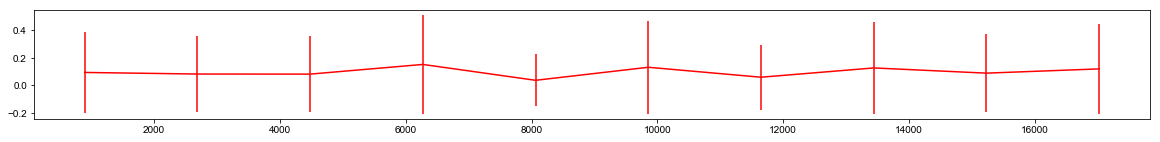

In [82]:
#FOR DIFFBUMHMM ex vivo

npa= alldata.as_matrix(columns=alldata.columns[12:13])
y= np.squeeze(npa)
y[y < 0.95] = 0 
print(y)

npa2= alldata.as_matrix(columns=alldata.columns[0:1])
x= np.squeeze(npa2)
print(x.shape)

nbins = 10

n, _ = np.histogram(x, bins=nbins)

sy, _ = np.histogram(x, bins=nbins, weights=y)

sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
print(_)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

#plt.plot(x, y, 'bo')
#plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')
print((_[1:] + _[:-1])/2)

print(n)
print(sy)
print(mean)

actual_bin_delimiters=np.around((_[1:] + _[:-1])/2)
print(actual_bin_delimiters)


#Assigning value based on the bin which nucleotide falls into
alldata["bin"] = 0
for index, row in alldata.iterrows():
    print(alldata.loc[row.name,"bin"])
    for indice, binno in enumerate(actual_bin_delimiters):
        if row.values[0]<binno and row.values[-1]==0:
            alldata.loc[row.name,"bin"] = indice+1
            break
        else:
            alldata.loc[row.name,"bin"] = len(actual_bin_delimiters)
             
            
            
            
            
            
            
       
        
   # if row['diffBUMHMM_ex_vivo'] > 0.95:
        
        
      #  if row['CELF1'] >0:
      #      for index, binno in enumerate(actual_bin_delimiters):
      #          if row.values[0]<int(binno):
                    
                    
                    
                    
                 ##   print(index)
                   #print(binno)
                   # print(row.values[0])
                   
                    
                    
               # if row['Nucleotide'].values[0] < binno:

                    
            
                
            
    





,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR,bin
0,1,C,0,0,0.0,0,0,0,0,0,0,1.693237e-14,1.790644e-20,0,1
1,2,G,0,0,0.0,0,0,0,0,0,0,6.789051e-03,6.823904e-03,0,1
2,3,G,0,0,0.0,0,0,0,0,0,0,9.031615e-03,9.110841e-03,0,1
3,4,C,0,0,0.0,0,0,0,0,0,0,6.793530e-03,6.927069e-03,0,1
4,5,T,0,0,0.0,0,0,0,0,0,0,1.128597e-08,5.186918e-06,0,1
5,6,T,0,0,0.0,0,0,0,0,0,0,1.191380e-04,1.037761e-11,0,1
6,7,G,0,0,0.0,0,0,0,0,0,0,2.249087e-13,1.555269e-04,0,1
7,8,C,0,0,0.0,0,0,0,0,0,0,5.313845e-26,9.078989e-28,0,1
8,9,T,0,0,0.0,0,0,0,0,0,0,9.080458e-23,1.662307e-16,0,1
9,10,C,0,0,0.0,0,0,0,0,0,0,5.215553e-19,9.387933e-31,0,1


In [33]:
import pandas
df=pd.qcut(alldata.columns



0    (3.62e-18, 4.68e-06]
1         (4.68e-06, 1.0]
2         (4.68e-06, 1.0]
3         (4.68e-06, 1.0]
4    (3.62e-18, 4.68e-06]
Name: diffBUMHMM_in_cell, dtype: category
Categories (4, interval[float64]): [(-999.001, 3.880000000000001e-37] < (3.880000000000001e-37, 3.62e-18] < (3.62e-18, 4.68e-06] < (4.68e-06, 1.0]]

In [21]:
alldata

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR
0,1,C,0,0,0.0,0,0,0,0,0,0,1.693237e-14,1.790644e-20,0
1,2,G,0,0,0.0,0,0,0,0,0,0,6.789051e-03,6.823904e-03,0
2,3,G,0,0,0.0,0,0,0,0,0,0,9.031615e-03,9.110841e-03,0
3,4,C,0,0,0.0,0,0,0,0,0,0,6.793530e-03,6.927069e-03,0
4,5,T,0,0,0.0,0,0,0,0,0,0,1.128597e-08,5.186918e-06,0
5,6,T,0,0,0.0,0,0,0,0,0,0,1.191380e-04,1.037761e-11,0
6,7,G,0,0,0.0,0,0,0,0,0,0,2.249087e-13,1.555269e-04,0
7,8,C,0,0,0.0,0,0,0,0,0,0,5.313845e-26,9.078989e-28,0
8,9,T,0,0,0.0,0,0,0,0,0,0,9.080458e-23,1.662307e-16,0
9,10,C,0,0,0.0,0,0,0,0,0,0,5.215553e-19,9.387933e-31,0


C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


[ 0.          0.          0.          0.         -0.08134609 -0.17899745
 -0.11360748 -0.18636364 -0.21298798  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.07233615  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.19641908
 -0.0354708  -0.10421651  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.     

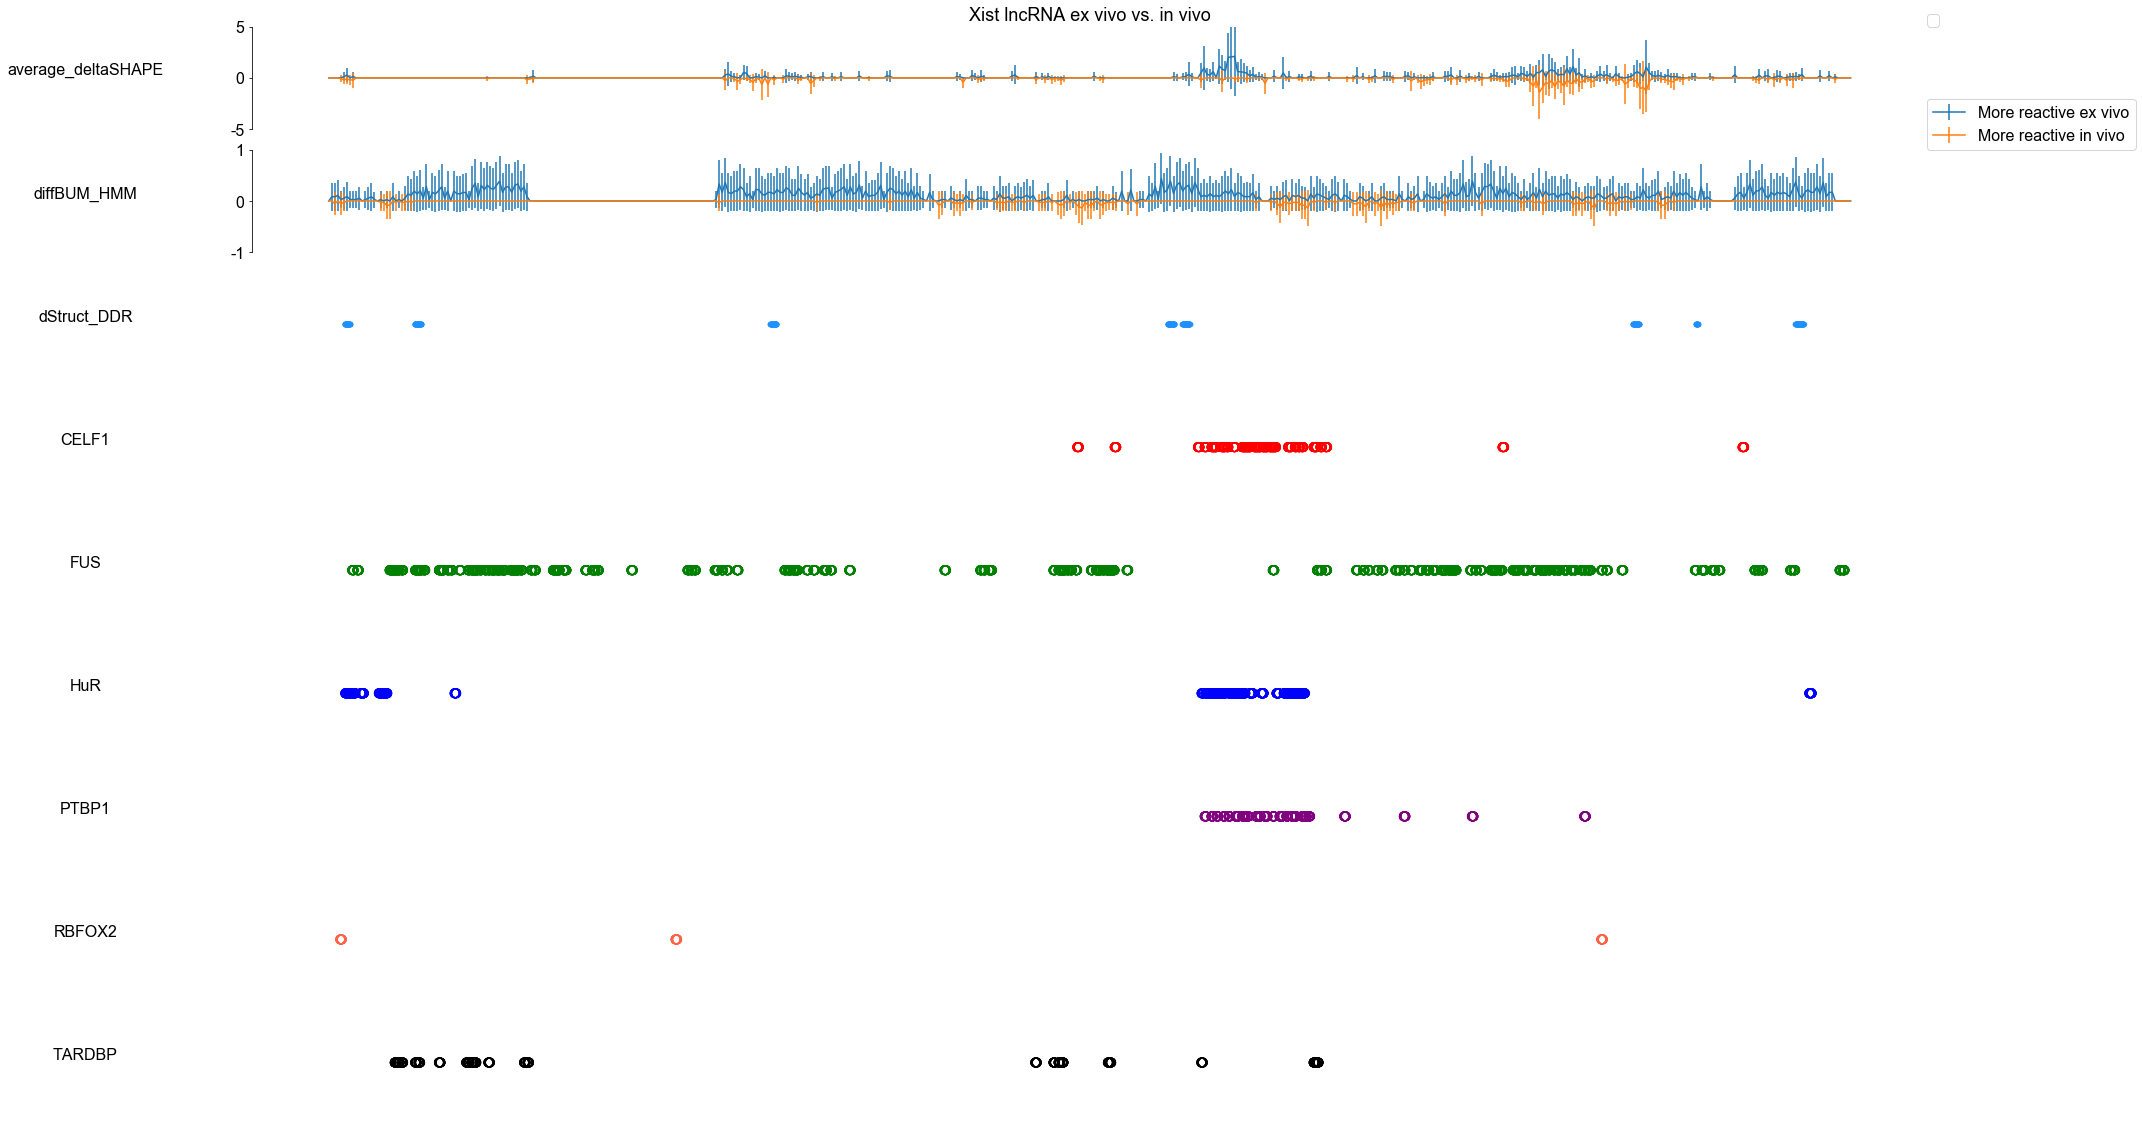

In [52]:
import copy

count = 0
numberofplots = 9

fig,ax = plt.subplots(numberofplots,figsize=[30,20],sharex=True)


nucleotides=alldata.as_matrix(columns=alldata.columns[0:1])
avgdeltashape= alldata.as_matrix(columns=alldata.columns[4:5])


nucleotides = np.squeeze(nucleotides)


exvivo=copy.deepcopy(avgdeltashape)
invivo=copy.deepcopy(avgdeltashape)
exvivo[exvivo < 0] = 0 
invivo[invivo > 0] = 0 

exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)


#plusvalues = alldata[alldata['average_deltaSHAPE'] > 0]

#x = plusvalues.index
#y = plusvalues['average_deltaSHAPE'].values

nbins = 500
n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)


plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean, yerr=std)
#, fmt='r-'
del n
del _
del sy
del sy2
del mean
del std

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

print(mean)
minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean, yerr=std)
#, fmt='b-'


#exvivo = ax[count].scatter(x,y, s=0.5)
#minusvalues = alldata[alldata['average_deltaSHAPE'] < 0]
#x = minusvalues.index
#y = minusvalues['average_deltaSHAPE'].values
#invivo = ax[count].scatter(x,y,s=0.5)
#xticks = list(np.arange(1,len(alldata.index),1000))



ymin = -5
ymax = 5
formatAxes(ax[count],\
           text_size = 16,\
           ylabel = 'average_deltaSHAPE',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)





ax[count].set_title('Xist lncRNA ex vivo vs. in vivo',fontsize=18)
ax[count].legend((exvivo,invivo), ('More reactive ex vivo', 'More reactive in vivo'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

count += 1


nucleotides=alldata.as_matrix(columns=alldata.columns[0:1])
exvivo= alldata.as_matrix(columns=alldata.columns[12:13])
invivo=alldata.as_matrix(columns=alldata.columns[11:12])

nucleotides = np.squeeze(nucleotides)
exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)

exvivo[exvivo < 0.95] = 0 


invivo[invivo < 0.95] = 0 

#exvivo = alldata['diffBUMHMM_ex_vivo']
#invivo = alldata['diffBUMHMM_in_cell']



#exvivo[exvivo < threshold] = np.nan
#invivo[invivo < threshold] = np.nan


### Only plotting everything that is higher than 0.05
#exvivo[exvivo < 0.05] = np.nan
#invivo[invivo < 0.05] = np.nan


#print(exvivo)
#x = exvivo.index
#y = exvivo.values

#print(y)

#y=

'''
npa= alldata.as_matrix(columns=alldata.columns[12:13])
y= np.squeeze(npa)
y[y < 0.95] = 0 
print(y)

npa2= alldata.as_matrix(columns=alldata.columns[0:1])
x= np.squeeze(npa2)
print(x.shape)

nbins = 300

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

#plt.plot(x, y, 'bo')
#plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

'''

nbins = 500
n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)


plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean, yerr=std)
#, fmt='r-'
del n
del _
del sy
del sy2
del mean
del std

#greater_than_threshold_plus = [i for i, val in enumerate(y) if val>threshold]

#plus_threshold= ax[count].scatter(x[greater_than_threshold_plus],y[greater_than_threshold_plus],s=0.5, )



n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)


minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean*(-1), yerr=std)
#, fmt='b-'




#x = invivo.index
#y = -invivo.values
#minus = ax[count].scatter(x,y,s=0.5, c='g')


#greater_than_threshold_minus= [i for i, val in enumerate(y) if val *(-1)>threshold]
#minus_threshold= ax[count].scatter(x[greater_than_threshold_minus],y[greater_than_threshold_minus],s=0.5)

ax[count].legend((plus,minus), ('More reactive ex vivo', 'More reactive in vivo'), loc=[1,1], fontsize = 16)
ymin = -1
ymax = 1
formatAxes(ax[count],\
           text_size = 16,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

#ax[count].axhline(y=threshold, color='k', linestyle=':')
#neg_threshold = threshold * (-1)
#ax[count].axhline(y=neg_threshold, color='k', linestyle=':')






count += 1
name = 'dStruct_DDR'
selection = alldata[name][alldata[name] > 0]
x = selection.index
y = selection.values
ax[count].scatter(x,y,s=20, facecolors='dodgerblue', edgecolors='dodgerblue')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'CELF1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].set_yticks([1])
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='r')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'FUS'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='green')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'HuR'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='blue')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'PTBP1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='purple')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'RBFOX2'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='tomato')
formatAxes(ax[count],ylabel=name,text_size=16)

count += 1
name = 'TARDBP'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='black')
formatAxes(ax[count],ylabel=name,text_size=16)

fig.align_ylabels()
output_filename = "TEST_diffBUM_HMM_SCALED_DC_Xist_ex_vivo_vs_in_vivo_"+ str(threshold) +".pdf"
fig.savefig(output_filename, dpi= 300)